# Image processing with Markov chains

The biggest drawback of Markov chains is their one-dimensionality. As images are two-dimensional objects, we need to find a way to flatten images to one-dimensional vectors. One of the best options is to use discrete Hilbert curves. They keep most points that are close in 2D also close in 1D.


<img src = 'packages/hilbert_curve/nD=2_p=3.png' width=100%>

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import sklearn

from pandas import Series
from pandas import DataFrame
from typing import Tuple

from tqdm import tnrange#, tqdm_notebook
from sklearn.linear_model import LogisticRegression
from plotnine import *

from packages.hilbert_curve.hilbert import HilbertCurve

# Local imports
from common import *
from convenience import *

## I. Image sampling and processing functions

### Luminocity-based grayscale conversion

In [2]:
def convert_to_grayscale(image: np.array)-> np.array:
    """Converts RGB image to grayscale image preserving perceived luminocity""" 
    return 0.299 * image[:,:,0] + 0.587 * image[:,:,1] + 0.114 * image[:,:,2]

In [3]:
from matplotlib import pyplot as plt
image = plt.imread('data/images/checkerboard.png')

Test for the function.

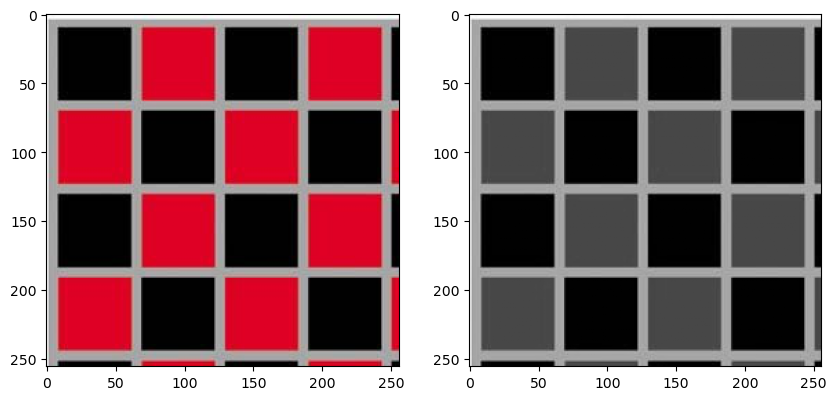

In [4]:
image = image[:256,:256, :]
gimage = convert_to_grayscale(image)


fig=plt.figure(figsize=(10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(image)
fig.add_subplot(1, 2, 2)
plt.imshow(gimage, cmap ='gray')


## Image to vector based on Hilbert curve mapping

In [5]:
def image_to_hcurve(image: np.array) -> Tuple[np.array, np.array]:
    """
    
    For simplicity expects image size to be square and a power of two. If this 
    is not the case, it selects the largest subimage satisfying this restriction. 
    
    """
    assert len(image.shape) == 2 or len(image.shape) == 3, "We process only RGB and grayscale images"
        
    p = int(np.log2(np.min(image.shape[:2])))
    hilbert_curve = HilbertCurve(p, 2)
    idx = np.array([hilbert_curve.coordinates_from_distance(i) for i in range(4**p)])
    
    if len(image.shape) == 3:
        curve = image[idx[:, 0], idx[:, 1], :]
    elif len(image.shape) == 2:
        curve = image[idx[:, 0], idx[:, 1]]
    
    return curve, idx


def hcurve_to_image(curve: np.array, idx: np.array=None)-> np.array:
    assert idx is None or curve.shape[0] == idx.shape[0], 'Transformation index'

    p = int(0.5 * np.log2(curve.shape[0]))

    if idx is None:
        hilbert_curve = HilbertCurve(p, 2)
        idx = np.array([hilbert_curve.coordinates_from_distance(i) for i in range(4**p)])
    
    image = np.full([2**p, 2**p, 3], np.nan)
    image[idx[:, 0], idx[:, 1], :] = curve
    return image

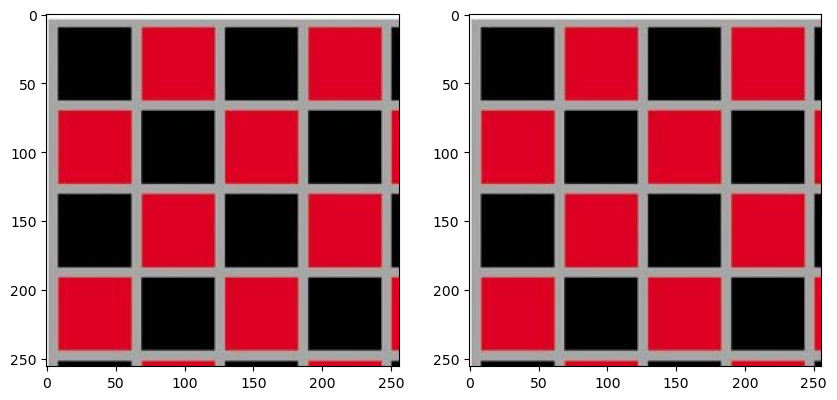

In [6]:
curve, idx = image_to_hcurve(image)

fig=plt.figure(figsize=(10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(image)
fig.add_subplot(1, 2, 2)
plt.imshow(hcurve_to_image(curve, idx))

## II. Other examples of textures

In the homework you can try out other images besides checkerboard pattern like images of bark and moss. For simplicity, you can convert both images to grayscale and predict only the luminocity of a pixel with Markov model. 

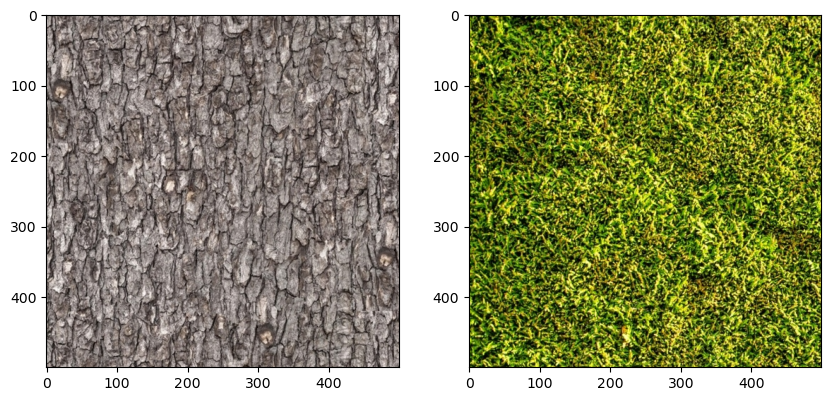

In [12]:
# Let us extract 500 x 500 subimages
bark = plt.imread('data/images/bark.png')[:500, :500, :]
moss = plt.imread('data/images/moss.png')[:500, :500, :]

fig=plt.figure(figsize=(10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(bark)
fig.add_subplot(1, 2, 2)
plt.imshow(moss)

### Luminocity based grayscale conversion

In [13]:
def convert_to_grayscale(image: np.array)-> np.array:
    """Converts RGB image to grayscale image preserving perceived luminocity based on Y_601 formula""" 
    return 0.2989 * image[:,:,0] + 0.5870 * image[:,:,1] + 0.1140 * image[:,:,2]

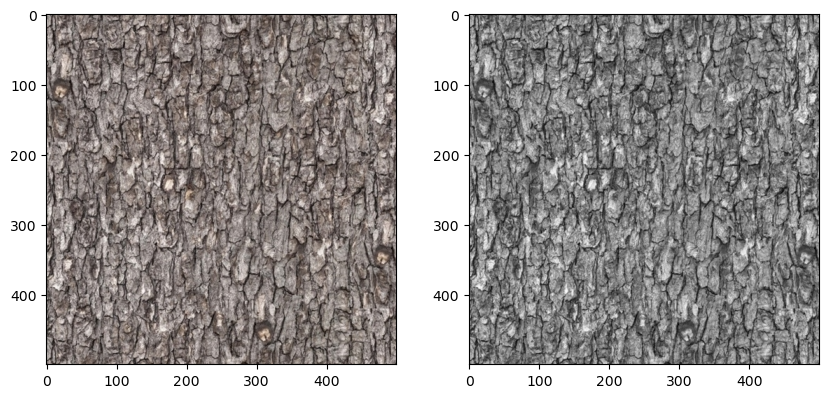

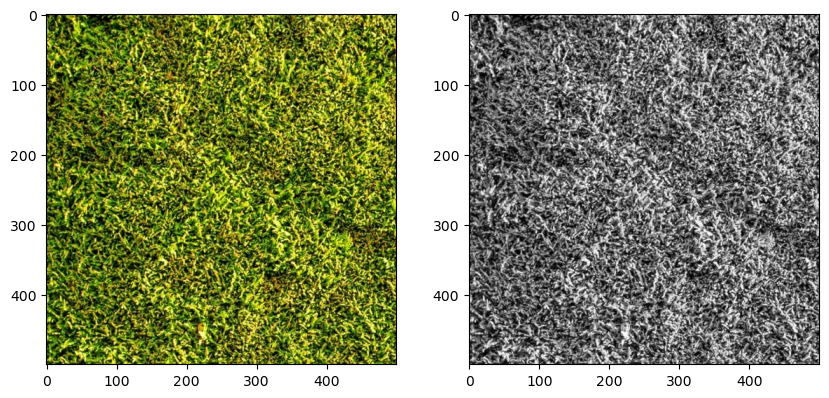

In [14]:
bw_bark = convert_to_grayscale(bark)
bw_moss = convert_to_grayscale(moss)

fig=plt.figure(figsize=(10,10))
fig.add_subplot(2, 2, 1)
plt.imshow(bark)
fig.add_subplot(2, 2, 2)
plt.imshow(bw_bark, cmap='gray')
fig = plt.figure(figsize=(10,10))
fig.add_subplot(2, 2, 3)
plt.imshow(moss)
fig.add_subplot(2, 2, 4)
plt.imshow(bw_moss, cmap='gray')

# Homework

## 4.1 Text synthesis with higher order Markov chains* (<font color='red'>3p</font>)

One of the nicest properties of the Hilbert curve is that it is self-similar. Thus, you can take a large picture and fit a large Hilbert curve on it and get a long Markov chain. Later on you can take the fitted model and fill a much smaller curve with it. Use this idea to build a texture synthesiser.

* Take a picture with a reasonably uniform texture -- grayscale image of a bark or a moss. 
* Train a higher order Markov chain on it. You can use the model that assigns the highest likelihood.
* You must make some compromises as the state space explodes otherwise. Describe these.
* Synthesise texture based on the fitted model and compare with the original texture. 
* How good is it and what are the artefacts?